# Simulating a Binomial Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binomtest

## 1. Introduction

In [2]:
monthly_report = pd.read_csv('monthly_report.csv')

- The next few exercises will walk through the process of using a binomial test to analyze data from a hypothetical online company, Live-it-LIVE.com — a website that sells all the necessary props and costumes to recreate iconic movie scenes at home!
- The data we’ll be working with has been loaded for you in the workspace and saved as an object named `monthly_report`. 
- Print `monthly_report` so that you can inspect it in the web browser.
- Note that the `purchase` column tells us whether a purchase was made; if so, the item that was purchased is listed in the `item` column. 
- Feel free to scroll through the data so you can inspect more of the items!

In [3]:
monthly_report

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN
...,...,...,...
495,2020-01-16 08:40:02,n,NaN
496,2020-01-09 21:11:19,n,NaN
497,2020-01-31 08:54:51,n,NaN
498,2020-01-21 19:35:03,n,NaN


## 2. Summarizing the Sample

In [4]:
monthly_report = pd.read_csv('monthly_report.csv')

- Each row of the dataset `monthly_report` represents a single visitor to Live-it-LIVE.com during the month in question. 
- Use `.head()` to print the first five rows of the data once again and inspect the `'purchase'` column. 
- What are the values and how can you tell whether someone made a purchase?

In [5]:
monthly_report.head()

# The `purchase` column contains `y` and `n` values.
# If the value is `y`, then the visitor made a purchase. 
# If the value is `n`, then the visitor did not make a purchase.

,timestamp,purchase,item
0,2020-01-17 17:23:06,y,cue cards - love actually
1,2020-01-25 17:09:39,n,NaN
2,2020-01-25 05:22:01,n,NaN
3,2020-01-18 04:33:40,y,t-rex - jurassic park
4,2020-01-24 17:24:52,n,NaN


- Calculate the sample size and assign it to a variable named `sample_size`. 
- Print `sample_size`. 
- How many visitors accessed the website this month?

In [6]:
sample_size = len(monthly_report)
sample_size

500

- Calculate the number of visitors who made a purchase this month and save it to a variable named `num_purchased`. 
- Print `num_purchased`. How many visitors made a purchase this month?

In [7]:
num_purchased = np.sum(monthly_report.purchase == 'y')
num_purchased

np.int64(41)

## 3. Simulating Randomness

In [8]:
monthly_report = pd.read_csv('monthly_report.csv')

- Use the `random.choice()` function from NumPy to simulate a single visitor to Live-it-LIVE.com, who has a 10% chance of making a purchase (p=0.1). 
- Save the outcome as a variable named `one_visitor` and print it. 
- If the visitor made a purchase, the value of `one_visitor` should be `['y']`; if they did not make a purchase, it should be `['n']` (just like in the original data!).
- Did that one simulated visitor make a purchase?

In [9]:
one_visitor = np.random.choice(['y', 'n'], size=1, p=[0.1, 0.9])
one_visitor

array(['n'], dtype='<U1')

- Now, create a new list named `simulated_monthly_visitors`, which contains the randomly-generated outcomes for 500 visitors to Live-it-LIVE.com (still with a 10% chance of a purchase). 
- Print simulated_monthly_visitors out. 
- Do you see any visitors in this list who made a purchase?

In [10]:
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
simulated_monthly_visitors 

array(['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n',
       'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'y', 'n', 'y', 'n', 'n', 'n', 'y', 'n', 'y', 'y', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'y', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'y', 'n', 'n', 'y', 'n', 'n', 'y', 'n', 'n', 'n', 'y',
       'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'y', 'n',
       'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n', 'n', 'n', 'n',
       'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'n', 'n', 'n', 'n

## 4. Simulating the Null Distribution I

In [11]:
monthly_report = pd.read_csv('monthly_report.csv')
simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])

- You’ll see the code we used in the previous exercise to generate `simulated_monthly_visitors`, a list of 500 simulated outcomes, `'y'` (with probability 0.1) or `'n'`, indicating whether each imaginary site visitor made a purchase.
- Add a line of code to calculate the number of those simulated visitors who made a purchase. Save the result as `num_purchased` and print it out.

In [12]:
num_purchased = np.sum(simulated_monthly_visitors == 'y')
num_purchased

np.int64(53)

- Inspect the value of `num_purchased` from the previous instruction. 
- Is it close to 50 (which is what we would expect for a purchase probability of 10%)? 
- Less than? Greater than? Now try a few more times and see what other values of `num_purchased` you observe. 
- What’s the farthest number from 50 that you observe after pressing 5 times?

In [13]:
def simulate_monthly_visitors(size=1, loop=1):
    l = []
    for _ in range(loop):
        sim_vis = np.random.choice(['y', 'n'], size=size, p=[0.1, 0.9])
        num_purch = np.sum(sim_vis == 'y')
        l.append(num_purch)
    return l


simulate_monthly_visitors(500, 5)

[np.int64(54), np.int64(58), np.int64(36), np.int64(46), np.int64(50)]

## 5. Simulating the Null Distribution II

In [14]:
null_outcomes = []

- Now let’s ask the same question with regards to purchases: 
    - If we run an experiment where we simulate a sample of 500 visitors, each with a 10% chance of making a purchase, and record the number of purchases for that imaginary sample — then repeat that experiment a bunch of times — what are the minimum and maximum number of purchases that we’ll observe by random chance?
- Use a for-loop to repeat this process 10000 times. 
- Each time, append the number of simulated visitors who made a purchase to the list `null_outcomes`.

In [15]:
for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

- Outside of your loop, save the minimum and maximum values in null_outcomes as `null_min` and `null_max` respectively, then print them out. 
- How much does the number of purchases seem to be varying by random chance?

In [16]:
null_min = np.min(null_outcomes)
null_max = np.max(null_outcomes)

null_min, null_max

(np.int64(27), np.int64(78))

## 6. Inspecting the Null Distribution

In [17]:
null_outcomes = []

for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

- The list `null_outcomes` contains numbers of purchases simulated under the null hypothesis.
- Add code to plot a histogram of `null_outcomes` and inspect the plot. 
- What range of values occurs most frequently?

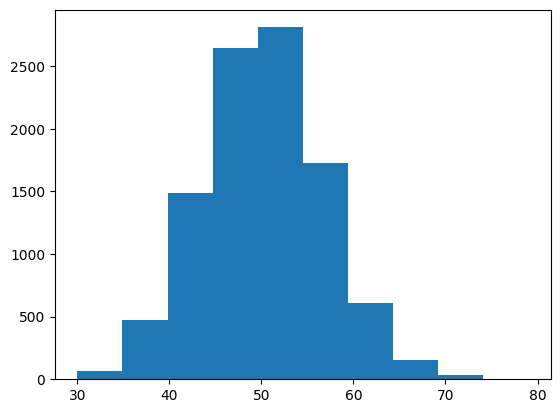

In [18]:
plt.hist(null_outcomes)
plt.show()

- In the month we’re investigating, we calculated that there were 41 purchases. 
- Add a vertical line to your histogram at 41. 
- Make this line red using `color = 'r'` so that you can see it.
- Where does 41 fall in this distribution? Is it relatively likely or unlikely?

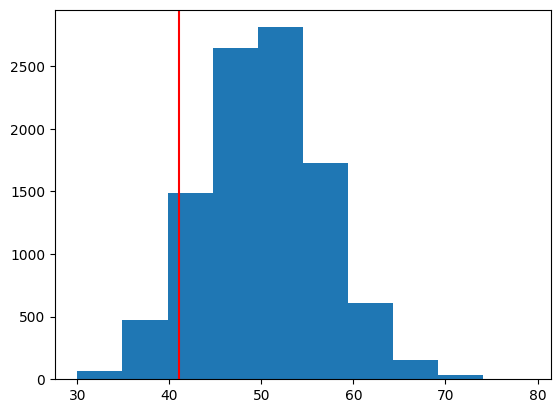

In [19]:
plt.hist(null_outcomes)
plt.axvline(x=41, color='red')
plt.show()

- 41 purchases is somewhat likely to occur based on this null distribution. 
- It’s not in the middle of the distribution, where there’s the most density, but it’s also not way out in the tails (which would mean it is very unlikely).

## 7. Confidence Intervals

In [20]:
null_outcomes = []

for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

- The code to generate `null_outcomes` has been provided for you. 
- Calculate an interval covering the middle 90% of the values in `null_outcomes`. 
- Save the output in a variable named `null_90CI` and print it out. 
- Is the observed value of 41 purchases inside or outside this interval?

In [21]:
null_90CI = np.percentile(null_outcomes, [5, 95])
null_90CI

array([39., 61.])

- Yes, the observed value of 41 purchases is inside the 90% confidence interval.

## 8. Calculating a One-Sided P-Value

### Using a Fair Coin

In [22]:
outcomes_heads = [] # Will store the number of heads from each simulation
for _ in range(10000):
    # Simulate 10 coin flips
    outcome = np.random.choice(['head', 'tail'], size=10, p=[0.5, 0.5])
    # Count the number of heads
    outcome_heads = np.sum(outcome == 'head')
    # Append the number of heads to outcomes_heads
    outcomes_heads.append(outcome_heads)

# Calculate the p-value
# Calculate the probability of observing 2 or fewer heads
p_value = np.sum(np.array(outcomes_heads) <= 2)/len(outcomes_heads)
p_value

np.float64(0.0547)

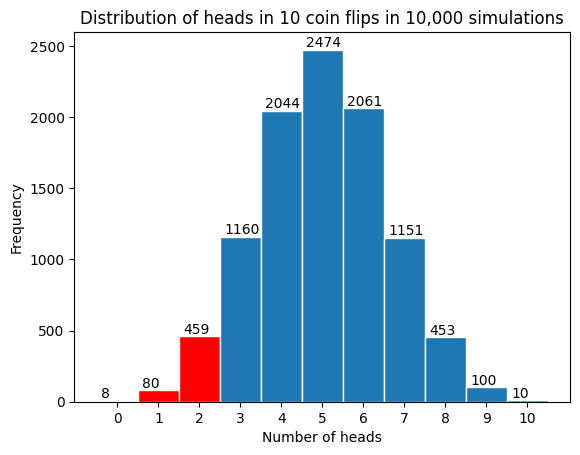

In [23]:
n, bins, patches = plt.hist(outcomes_heads, bins=range(12), edgecolor='white', align='left')

for i, patch in enumerate(patches):
    if i in [0, 1, 2]:  # Bars 0, 1, 2
        patch.set_facecolor('#FF0000')

plt.xticks(range(11)) 
plt.xlabel('Number of heads')
plt.ylabel('Frequency')
plt.title('Distribution of heads in 10 coin flips in 10,000 simulations')
for i in range(len(n)):
    plt.text(bins[i]-0.4, n[i]+20, str(int(n[i])))
plt.show()

### Using the Example above

In [24]:
null_outcomes = []

for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

- Use `null_outcomes` to estimate the p-value for a binomial hypothesis test with the following null and alternative hypotheses:
    - **Null**: the probability of a purchase was 10%
    - **Alternative**: the probability of a purchase rate was LESS THAN 10%
- In other words, calculate the proportion of values in `null_outcomes` that are less than or equal to 41 (the observed number of purchases that we calculated earlier). 
- Save this number as a variable named `p_value` and print it out.
- Try a few times; You should see slightly different values of `p_value` each time. 
- What do you think the true probability is?

In [25]:
p_value = np.sum(np.array(null_outcomes) <= 41)/len(null_outcomes)
p_value

np.float64(0.0982)

## 9. Calculating a Two-Sided P-Value

### Using a Fair Coin

In [26]:
outcomes_heads = [] # Will store the number of heads from each simulation
for _ in range(10000):
    # Simulate 10 coin flips
    outcome = np.random.choice(['head', 'tail'], size=10, p=[0.5, 0.5])
    # Count the number of heads
    outcome_heads = np.sum(outcome == 'head')
    # Append the number of heads to outcomes_heads
    outcomes_heads.append(outcome_heads)

# Calculate the p-value
# Calculate the probability of observing 2 or fewer heads or 8 or more heads
p_value = np.sum((np.array(outcomes_heads) <= 2) | (np.array(outcomes_heads) >= 8))/len(outcomes_heads)
p_value

np.float64(0.1065)

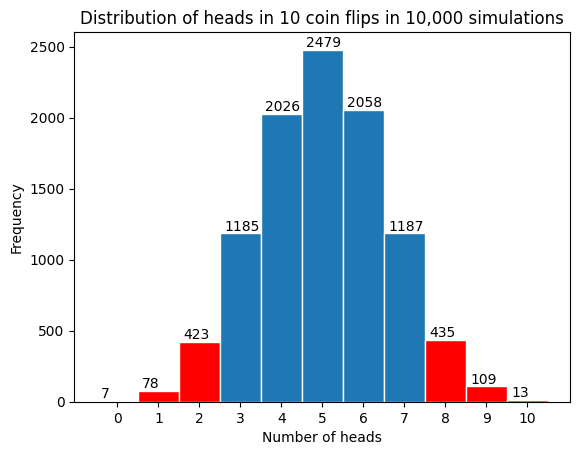

In [27]:
n, bins, patches = plt.hist(outcomes_heads, bins=range(12), edgecolor='white', align='left')

for i, patch in enumerate(patches):
    if i in [0, 1, 2, 8, 9, 10]:  # Bars 0, 1, 2, 8, 9, 10
        patch.set_facecolor('#FF0000')

plt.xticks(range(11)) 
plt.xlabel('Number of heads')
plt.ylabel('Frequency')
plt.title('Distribution of heads in 10 coin flips in 10,000 simulations')
for i in range(len(n)):
    plt.text(bins[i]-0.4, n[i]+20, str(int(n[i])))
plt.show()

### Using the Example above

In [28]:
null_outcomes = []

for i in range(10000):
    simulated_monthly_visitors = np.random.choice(['y', 'n'], size=500, p=[0.1, 0.9])
    num_purchased = np.sum(simulated_monthly_visitors == 'y')
    null_outcomes.append(num_purchased)

- Use `null_outcomes` to calculate the p-value for a two-sided test (alternative hypothesis is that the purchase probability was DIFFERENT FROM 10%). 
- Remember that, if the purchase rate is 10%, we expect 50 of the 500 visitors to make a purchase.
- In other words, calculate the proportion of values in `null_outcomes` that are less than or equal to 41 (the number of purchases we observed in our sample, which is 9 fewer than 50) OR greater than or equal to 59 (which is 9 purchases more than 50).
-  Save this number as a variable named `p_value` and print it out.
- Again, try a few times to observe a few different estimates of `p_value`. 
- What do you think the true p-value is for this test?

In [29]:
p_value = np.sum((np.array(null_outcomes) <= 41) | (np.array(null_outcomes) >= 59))/len(null_outcomes)
p_value

np.float64(0.1965)

## 10. Writing a Binomial Test Function

- So far, we’ve conducted a simulated binomial hypothesis test for Live-it-LIVE.com. 
- In this exercise, we’ll use our code from the previous exercises to write our own binomial test function. 
- Our function will use simulation, so it will estimate (albeit fairly accurately) the same p-values we would get using much more complex mathematical equations.

<br>

- A function has been outlined for you which contains the code that we used for Live_it_LIVE inside a function named `simulation_binomial_test()`. 
- Your goal in the next few exercises will be to edit this function so that it takes in any values for the following:
    - The observed sample statistic (eg., 41 purchases)
    - The sample size (eg., 500 visitors)
    - The null probability of success (eg., 0.10 probability of a purchase)
- The function should return a p-value for a one-sided test where the alternative hypothesis is that the true probability of success is LESS THAN the null.

**Tasks:**

- The `simulation_binomial_test()` function has been outlined for you in script.py. 
- Add the following parameters to the function (in this order):
    - `observed_successes` (the observed sample statistic, eg., 41 purchases)
    - `n` (the sample size, eg., 500 visitors)
    - `p` (the null probability of success, eg., 0.10)

- Next, edit the `simulation_binomial_test()` function to remove all of the hard-coded values (eg., 500, 0.1, 0.9, and 41) so that the proper parameters are used in each calculation.

In [32]:
def simulation_binomial_test(observed_successes, n, p):
    #initialize null_outcomes
    null_outcomes = []
    
    #generate the simulated null distribution
    for i in range(10000):
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        null_outcomes.append(num_purchased)
    
    #calculate a 1-sided p-value
    null_outcomes = np.array(null_outcomes)
    p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
    
    #return the p-value
    return p_value

- Test out your function and compare the results to the SciPy `binomtest()` function. 
- Do you get similar answers?

In [33]:
p_value1 = simulation_binomial_test(45, 500, .1)
print("simulation p-value: ", p_value1)

simulation p-value:  0.2545


In [38]:
p_value2 = binomtest(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2)

binom_test p-value:  BinomTestResult(k=45, n=500, alternative='less', statistic=0.09, pvalue=0.254689260562342)


## 11. Binomial Testing with SciPy

- Use the `binomtest` function to run the same binomial test that you just simulated: 
    - A two-sided test for whether the observed 41 purchases among 500 visitors to Live-it-LIVE.com is far enough from the expected 10% purchase rate to convince you that the purchase rate was different from expectation this week.
- Save the p-value as `p_value_2sided` and print it out. 
- Is this p-value similar to what you calculated via simulation (approximately 0.2)?

In [40]:
p_value_2sided = binomtest(41, 500, .1)
p_value_2sided.pvalue

np.float64(0.20456397700682577)

- Run the same hypothesis test as in step 1, but now as a one-sided test where the alternative hypothesis is that the probability of a visitor making a purchase was less than 10% (0.1).
- Save the p-value as `p_value_1sided` and print it out. 
- Is this p-value similar to what you calculated via simulation (approximately 0.1)?

In [41]:
p_value_1sided = binomtest(41, 500, .1, alternative='less')
p_value_1sided.pvalue

np.float64(0.10011352697567102)

## 12. Review

-  To summarize, here are some of the things you’ve learned about hypothesis tests in general:
    - All hypothesis tests start with a null and alternative hypothesis
    - Outcomes of a hypothesis test that might be reported include:
        - confidence intervals
        - p-values
    - A hypothesis test can be simulated by:
        - taking repeated random samples where the null hypothesis is assumed to be true
        - using those simulated samples to generate a null distribution
        - comparing an observed sample statistic to that null distribution

In [42]:
def simulation_binomial_test(observed_successes, n, p):
    #initialize null_outcomes
    null_outcomes = []
    
    #generate the simulated null distribution
    for i in range(10000):
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        null_outcomes.append(num_purchased)
    
    #calculate a 1-sided p-value
    null_outcomes = np.array(null_outcomes)
    p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
    
    #return the p-value
    return p_value

- As a challenge, see if you can re-write the simulation-based binomial test function so that it has an input named `alternative_hypothesis` that can be equal to '`less`', '`not_equal`', or '`greater`'. 
- Then change the function so that it performs the appropriate one- or two-sided test for the alternative hypothesis provided. 

In [43]:
def simulation_binomial_test(observed_successes, n, p, alternative_hypothesis):
    #initialize null_outcomes
    null_outcomes = []
    
    #generate the simulated null distribution
    for i in range(10000):
        simulated_monthly_visitors = np.random.choice(['y', 'n'], size=n, p=[p, 1-p])
        num_purchased = np.sum(simulated_monthly_visitors == 'y')
        null_outcomes.append(num_purchased)
    
    null_outcomes = np.array(null_outcomes)

    #calculate a 1-sided p-value
    if alternative_hypothesis == 'less':
        p_value = np.sum(null_outcomes <= observed_successes)/len(null_outcomes) 
    elif alternative_hypothesis == 'greater':
        p_value = np.sum(null_outcomes >= observed_successes)/len(null_outcomes)
    else:
        diff = np.abs(p*n - observed_successes)
        lower = p*n - diff
        upper = p*n + diff
        p_value = np.sum((null_outcomes <= lower) | (null_outcomes >= upper))/len(null_outcomes)

    
    #return the p-value
    return p_value

In [51]:
print('lower tail one-sided test:')
p_value1 = simulation_binomial_test(45, 500, .1, alternative_hypothesis = 'less')
print("simulation p-value: ", p_value1)
p_value2 = binomtest(45, 500, .1, alternative = 'less')
print("binom_test p-value: ", p_value2.pvalue)

print('\nupper tail one-sided test:')
p_value1 = simulation_binomial_test(53, 500, .1, alternative_hypothesis = 'greater')
print("simulation p-value: ", p_value1)
p_value2 = binomtest(53, 500, .1, alternative = 'greater')
print("binom_test p-value: ", p_value2.pvalue)

print('\ntwo-sided test:')
p_value1 = simulation_binomial_test(42, 500, .1, alternative_hypothesis = 'not_equal')
print("simulation p-value: ", p_value1)
p_value2 = binomtest(42, 500, .1)
print("binom_test p-value: ", p_value2.pvalue)

lower tail one-sided test:
simulation p-value:  0.249
binom_test p-value:  0.254689260562342

upper tail one-sided test:
simulation p-value:  0.3519
binom_test p-value:  0.34838119949983054

two-sided test:
simulation p-value:  0.2669
binom_test p-value:  0.2631383468731764
